<a href="https://colab.research.google.com/github/toot09/keras_basic/blob/master/Keras_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 케라스(Keras) 기초부터 모델 생성까지

<img src="https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png">

- 파이썬으로 작성된 고수준 신경망 API로 TensorFlow, CNTK, 혹은 Theano와 함께 사용 가능
- 사용자 친화성, 모듈성, 확장성을 통해 빠르고 간편한 프로토타이핑 가능
- 컨볼루션 신경망, 순환 신경망, 그리고 둘의 조합까지 모두 지원
- CPU와 GPU에서 매끄럽게 실행

In [ ]:
import numpy as np
import tensorflow as tf

tf.__version__

'2.5.0'

레이어들을 import하는 방식 (1)
- 일일이 import 하지 않아도 됨

- 코드가 다소 길어질 수 있음

In [ ]:
from tensorflow import keras

keras.__version__

'2.5.0'

In [ ]:
keras.layers.Dense(10, activation='sigmoid')

In [ ]:
keras.Model()

In [ ]:
keras.models.Sequential()

레이어들을 import하는 방식 (2)
- 일일이 import 해야함
- 코드가 간결

In [ ]:
from tensorflow.keras.layers import Dense, Input, Flatten, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model

In [ ]:
Dense(10, activation='sigmoid')

In [ ]:
Flatten(input_shape=[28,28])

In [ ]:
X_train = np.random.randn(5,10)
Input(shape=X_train.shape[1:])

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'input_1')>

In [ ]:
print(X_train.shape)
print(X_train.shape[1:])

(5, 10)
(10,)


## 주요 레이어

### Dense

- Dense 는 입력과 출력을 모두 연결해주는 NN 레이어이다. keras에서는 Dense가 클래스로 구현되어 있다. Dense로 만든 node는 각각 W, B를 가진다. model의 fit함수를 호출하여 학습시킨다.

- Fully-Connected Layer

- 노드수(유닛수), 활성화 함수 등을 지정

- name을 통한 레이어간 구분 가능

- 기본적으로  
  'Glorot_uniform' 가중치(Xabier 분포 초기화), zeros bias로 초기화
  - kernel_initializer 인자를 통해 다른 가중치 초기화를 진행할 수 있음

In [ ]:
dense = Dense(10, activation='relu', name='Dense Layer')

In [ ]:
dense

In [ ]:
dense2 = Dense(15, activation='softmax')

In [ ]:
dense2

### Activation
- Dense layer에서 미리 활성화함수를 지정할 수도 있지만 때에 따라서 따로 레이어를 만들어줄 수 있음

In [ ]:
dense = Dense(10, kernel_initializer='he_normal', name='Dense Layer')
dense = Activation(dense)
dense

### Flatten
- 배치 크기(또는 데이터 크기)를 제외하고 데이터를 1차원으로 쭉 펼치는 작업

- 예시)
        (128, 3, 2, 2) ---> (128, 12)
      

In [ ]:
x = Flatten(input_shape=(28,28))

### Input 
- 모델의 입력을 정의

- shape, dtype을 포함

- 하나의 모델은 여러 개의 입력을 가질 수 있음

- 'summary()' 메소드를 통해서는 보이지 않음

In [ ]:
input_1 = Input(shape=(28,28), dtype=tf.float32)
input_2 = Input(shape=(8,), dtype=tf.int32)

In [ ]:
input_1

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'input_3')>

In [ ]:
input_2

<KerasTensor: shape=(None, 8) dtype=int32 (created by layer 'input_4')>

## 모델 구성 방법
- Sequential()

- 서브클래싱(Subclassing)

- 함수형 API

### Sequential()

- 모델이 순차적으로 진행할 때 사용

- 간단한 방법
  - Sequential 객체 생성 후, **add**를 통한 방법
  
  - Sequential 인자에 한번에 추가

- 다중 입력 및 출력이 존재하는 등의 복잡한 모델을 구성할 수 없음


In [ ]:
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import plot_model

In [ ]:
model = Sequential()
model.add(Input(shape=(28,28)))
model.add(Dense(300, activation='relu', name='Layer1'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

모델 구조 확인
- model 객체의 **summary()** 이용

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer1 (Dense)               (None, 28, 300)           8700      
_________________________________________________________________
dense_11 (Dense)             (None, 28, 100)           30100     
_________________________________________________________________
dense_12 (Dense)             (None, 28, 10)            1010      
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


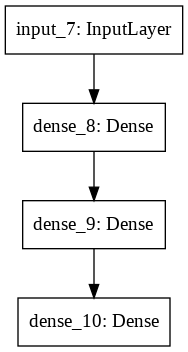

In [ ]:
plot_model(model)

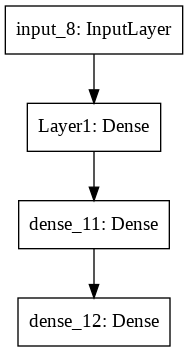

In [ ]:
plot_model(model, to_file='model1.png')

In [ ]:
!ls

model1.png  model.png  sample_data


In [ ]:
model = Sequential([Input(shape=(28,28), name='Input'),
                   Dense(300, activation='relu', name='Dense1'),
                   Dense(100, activation='relu', name='Dense2'),
                   Dense(10, activation='softmax', name='Output')])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense1 (Dense)               (None, 28, 300)           8700      
_________________________________________________________________
Dense2 (Dense)               (None, 28, 100)           30100     
_________________________________________________________________
Output (Dense)               (None, 28, 10)            1010      
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


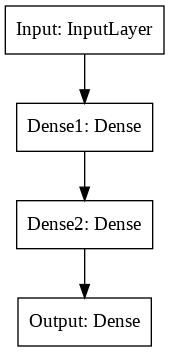

In [ ]:
plot_model(model)

### 함수형 API

- 가장 권장되는 방법

- 모델을 복잡하고, 유연하게 구성 가능

- 다중 입출력을 다룰 수 있음

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.utils import plot_model

In [ ]:
inputs = Input(shape=(28,28))
x = Flatten(input_shape=(28,28,1))(inputs)
x = Dense(300, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dense(100, activation='softmax')(x)

In [ ]:
model = Model(inputs=inputs, outputs=x)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_14 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_15 (Dense)             (None, 100)               10100     
Total params: 275,700
Trainable params: 275,700
Non-trainable params: 0
_________________________________________________________________


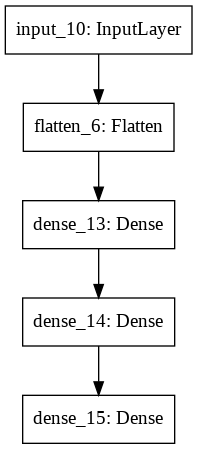

In [ ]:
plot_model(model)

In [ ]:
from tensorflow.keras.layers import Concatenate

input_layer = Input(shape=(28,28))
hidden1 = Dense(100, activation='relu', name='hidden1')(input_layer)
hidden2 = Dense(30, activation='relu', name='hidden2')(hidden1)
concat = Concatenate()([input_layer, hidden2])
output = Dense(1)(concat)

model = Model(inputs=[input_layer], outputs=[output])

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
hidden1 (Dense)                 (None, 28, 100)      2900        input_12[0][0]                   
__________________________________________________________________________________________________
hidden2 (Dense)                 (None, 28, 30)       3030        hidden1[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 28, 58)       0           input_12[0][0]                   
                                                                 hidden2[0][0]              

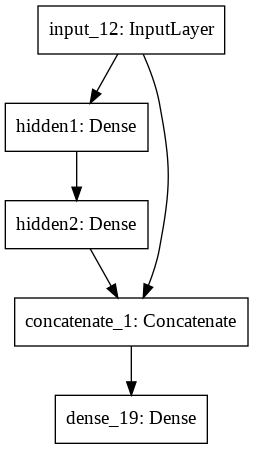

In [ ]:
plot_model(model)

In [ ]:
input_1 = Input(shape=(10,10))
input_2 = Input(shape=(10,28))
hidden1 = Dense(300, activation='relu', name='hidden1')(input_2)
hidden2 = Dense(100, activation='sigmoid', name='hidden2')(hidden1)
concat = Concatenate()([input_1, hidden2])
ouput = Dense(10, activation='softmax', name='output')(concat)

model = Model(inputs=[input_1, input_2], outputs=[ouput])

In [ ]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_30 (InputLayer)           [(None, 10, 28)]     0                                            
__________________________________________________________________________________________________
hidden1 (Dense)                 (None, 10, 300)      8700        input_30[0][0]                   
__________________________________________________________________________________________________
input_29 (InputLayer)           [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
hidden2 (Dense)                 (None, 10, 100)      30100       hidden1[0][0]                    
____________________________________________________________________________________________

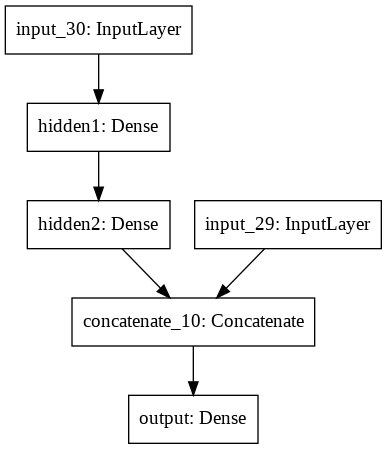

In [ ]:
plot_model(model)

In [ ]:
input = Input(shape=(28,28))

hidden1 = Dense(300, activation='relu')(input)
hidden2 = Dense(100, activation='relu')(hidden1)

main_output = Dense(1, activation='sigmoid')(hidden2)
sub_output = Dense(1)(hidden2)

model = Model(inputs=[input], outputs=[main_output, sub_output])

In [ ]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_32 (InputLayer)           [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
dense_25 (Dense)                (None, 28, 300)      8700        input_32[0][0]                   
__________________________________________________________________________________________________
dense_26 (Dense)                (None, 28, 100)      30100       dense_25[0][0]                   
__________________________________________________________________________________________________
dense_27 (Dense)                (None, 28, 1)        101         dense_26[0][0]                   
____________________________________________________________________________________________

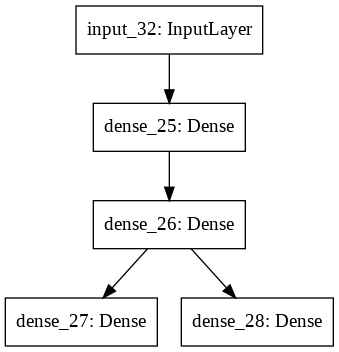

In [ ]:
plot_model(model)

In [ ]:
input_1 = Input(shape=(10,10), name='input_1')
input_2 = Input(shape=(10,28), name='input_2')

hidden1 = Dense(100, activation='relu')(input_2)
hidden2 = Dense(30, activation='relu')(hidden1)
concat = Concatenate()([input_1, hidden2])

main_output = Dense(1, activation='sigmoid', name='main_output')(concat)
sub_output = Dense(1, name='sub_output')(hidden2)

model = Model(inputs=[input_1, input_2], outputs=[main_output, sub_output])

In [ ]:
model.summary()

Model: "model_33"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 10, 28)]     0                                            
__________________________________________________________________________________________________
dense_121 (Dense)               (None, 10, 100)      2900        input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_122 (Dense)               (None, 10, 30)       3030        dense_121[0][0]                  
___________________________________________________________________________________________

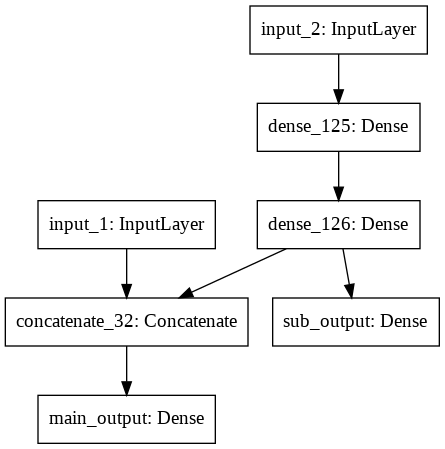

In [ ]:
plot_model(model)

### 서브클래싱(Subclassing)
- 커스터마이징에 최적화된 방법

- Model 클래스를 상속받아 Model이 포함하는 기능을 사용할 수 있음  
  - `fit()`, `evaluate()`, `predict()`
  - `save()`, `load()`

- 주로 `call()` 메소드안에서 원하는 계산 가능
  - for, if, 저수준 연산 등

- 권장되는 방법은 아니지만 어떤 모델의 구현 코드를 참고할 때  
  해석할 수 있어야함

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.utils import plot_model

In [ ]:
class MyMode(Model):
  def __init__(self, inits=30, activation='relu', **kwargs):
    supper(MyModel, self).__init__(**kwargs)

    self.dense_layer1 = Dense(300, activation=activation)
    self.dense_layer2 = Dense(100, activation=activation)
    self.dense_layer3 = Dense(units, activation=activation)

    self.output_layer = Dense(10, activation='softmax')

  def call(self, inputs):
    x = self.dense_layer1(inputs)
    x = self.dense_layer2(x)
    x = self.dense_layer3(x)
    x = self.output_layer(output_layer)
    return x


## 모델 가중치 확인

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.utils import plot_model

In [ ]:
inputs = Input(shape=(28,28,1))

x = Flatten(input_shape=(28,28,1))(inputs)
x = Dense(300, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=[inputs], outputs=[x])

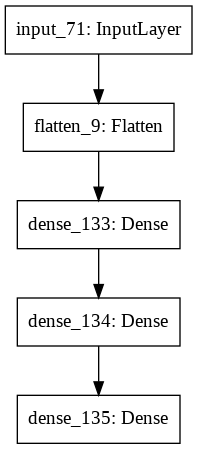

In [ ]:
plot_model(model)

모델의 레이어들이 리스트로 표현됨


In [ ]:
model.layers

In [ ]:
# 2번째 레이어의 이름
hidden_2 = model.layers[2]
hidden_2.name

'dense_133'

위의 layer name 참고

In [ ]:
model.get_layer('dense_133') is hidden_2

True

In [ ]:
weights, biases = hidden_2.get_weights()

In [ ]:
weights

array([[ 0.05198903, -0.01299543, -0.06839271, ...,  0.04112172,
        -0.01403132,  0.03593977],
       [-0.04873621,  0.03821569, -0.03423532, ..., -0.05294693,
        -0.04401139,  0.02225237],
       [ 0.0333132 ,  0.03065906, -0.03706983, ..., -0.0434422 ,
         0.04224695,  0.00668919],
       ...,
       [-0.0616928 , -0.0268052 ,  0.0058846 , ...,  0.0396046 ,
         0.02497531,  0.01899204],
       [-0.02354757, -0.00757222,  0.04950131, ..., -0.00553529,
         0.01222864,  0.06119077],
       [-0.05263135,  0.02660277,  0.02485389, ...,  0.06280835,
        -0.03738462, -0.04566802]], dtype=float32)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
# input shape(28*28=784), Dense units
print(weights.shape)
print(biases.shape)

(784, 300)
(300,)


## 모델 컴파일(compile)

- 모델을 구성한 후, 사용할 손실함수(loss), 옵티마이저(optimizer)를 지정


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

### 참고1

#### loss
- `keras.losses.sparse_categorical_crossentropy` 등과 같이 지정 가능
  - `sparse_categorical_crossentropy`  
    클래스가 배타적, 즉 MNIST 예제에서 (0, 1, 2, ..., 9)와 같은 방식으로 구분되어 있을 때 사용

  - `categorical_cross_entropy`
    클래스가 원-핫 인코딩 방식으로 되어 있을 때 사용

  - `binary_crossentropy`
  이진 분류를 수행할 때 사용


#### optimizer
- `keras.optimizer.SGD()` 등과 같이 사용 가능
  - 보통 옵티마이저의 튜닝을 위해 따로 객체를 생성하여 컴파일    
        optimizer = keras.optimizer.SGD(learning_rate=1e-5)  
        model.compile(...,
                      optimizer=optimzer,
                      ...)

- `keras.optimizer.Adam()` 도 많이 사용

#### metrics
- 모니터링할 지표

- 주로 'accuracy', 'acc'로도 가능


### 참고2 - 컴파일 설정 예시
- 평균 제곱 오차 회귀 문제  
      model.compile(loss = 'mse',  
                    optimizer = RMSprop(),  
                    metrics=['mae'])

- 이진 분류
      model.compile(loss = 'binary_crossentropy',  
                    optimizer = RMSprop(),  
                    metrics=['accuracy])



- 다항 분류
      model.compile(loss = 'categorical_crossentropy',  
                    optimizer = RMSprop(),  
                    metrics=['accuracy])
 


## 모델 훈련, 평가 및 예측
- `fit()` 함수

  - train_data(학습 데이터), train_label(데이터의 정답)
  
  - epochs
  
  - batch_size
  
  - validation_data

- `evaluate()` 함수
  - 테스트 데이터


- `predict()`
  임의의 데이터를 인자로 넣어 예측 가능

## MNIST 예제를 통해 모델 구성하기

- keras.datasets 에 포함되어 있는 데이터셋

  <img src="https://storage.googleapis.com/tfds-data/visualization/fig/mnist-3.0.1.png" width="400">

  <sub>출처: https://www.tensorflow.org/datasets/catalog/mnist</sub>

### modules import

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.utils import plot_model, to_categorical

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

### 데이터셋 로드
- MNIST 데이터셋을 로드

- Train Data 중, 30%를 검증 데이터(validation data)로 사용


In [89]:
tf.random.set_seed(111)

(x_train_full, y_train_full), (x_test, y_test) = load_data(path='mnist.npz')

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=111)

### 데이터 확인

In [8]:
num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

In [90]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  64,
        157, 255, 231, 230,  95,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [92]:
x_train[0]

array([[0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
      

In [6]:
print("학습 데이터 : {}\t레이블 : {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터 : {}\t레이블 : {}".format(x_train.shape, y_train.shape))
print("검증 데이터 : {}\t레이블 : {}".format(x_val.shape, y_val.shape))
print("테스트 데이터 : {}\t레이블 : {}".format(x_test.shape, y_test.shape))

학습 데이터 : (60000, 28, 28)	레이블 : (60000,)
학습 데이터 : (42000, 28, 28)	레이블 : (42000,)
검증 데이터 : (18000, 28, 28)	레이블 : (18000,)
테스트 데이터 : (10000, 28, 28)	레이블 : (10000,)


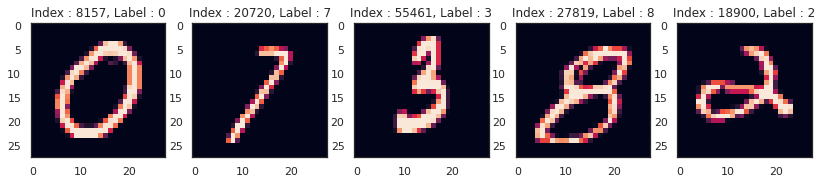

In [82]:
num_sample = 5

random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(14,8))

#print(random_idxs)

for i, idx in enumerate(random_idxs):
  #print(i, idx)
  img = x_train_full[idx, :]
  label = y_train_full[idx]

  plt.subplot(1, len(random_idxs), i+1)
  plt.imshow(img)
  plt.title("Index : {}, Label : {}".format(idx, label))

8


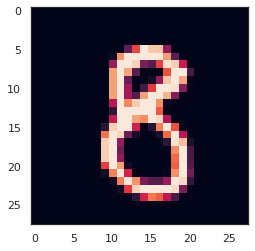

In [83]:
print(y_train[0])
img = x_train[0]
plt.imshow(img)

### 데이터 전처리
- Normalization

In [91]:
# 색 표현이 0~255 이기 떄문에 0~1 값으로 normalization 시키는것임
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [85]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [84]:
# Before to_categorical
y_train[:10]

array([8, 8, 6, 2, 8, 4, 7, 5, 5, 9], dtype=uint8)

In [86]:
# After to_categorical
y_train[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

### 모델 구성 (Sequential)

In [31]:
model = Sequential([Input(shape=(28,28), name='input'),
                    Flatten(input_shape=[28,28], name='flatten'),
                    Dense(100, activation='relu', name='dense1'),
                    Dense(64, activation='relu', name='dense2'),
                    Dense(32, activation='relu', name='dense3'),
                    # softmax 마지막 output은 숫자 답이 10개 이므로 unit은 10으로 함
                    Dense(10, activation='softmax', name='output')])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense1 (Dense)               (None, 100)               78500     
_________________________________________________________________
dense2 (Dense)               (None, 64)                6464      
_________________________________________________________________
dense3 (Dense)               (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


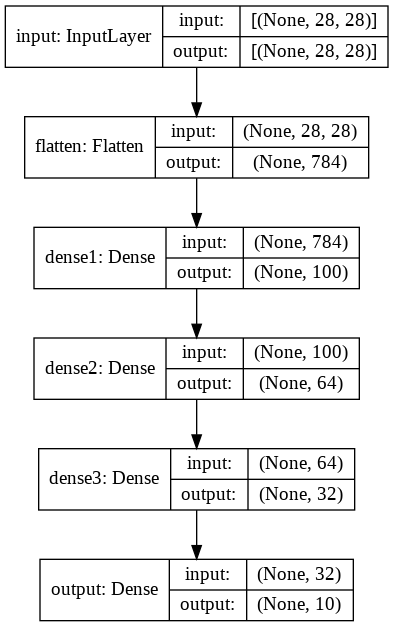

In [22]:
plot_model(model, show_shapes=True)

In [25]:
test = [[1,2],[3,4]]

### 모델 컴파일

In [33]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

### 모델 학습
- 모델 시각화를 위해 history라는 변수에 학습 과정을 담음

In [34]:
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/50
329/329 [==============================] - 2s 4ms/step - loss: 1.7780 - accuracy: 0.4878 - val_loss: 1.0713 - val_accuracy: 0.7389
Epoch 2/50
329/329 [==============================] - 1s 3ms/step - loss: 0.7363 - accuracy: 0.8097 - val_loss: 0.5506 - val_accuracy: 0.8498
Epoch 3/50
329/329 [==============================] - 1s 3ms/step - loss: 0.4761 - accuracy: 0.8680 - val_loss: 0.4228 - val_accuracy: 0.8779
Epoch 4/50
329/329 [==============================] - 1s 3ms/step - loss: 0.3942 - accuracy: 0.8883 - val_loss: 0.3770 - val_accuracy: 0.8881
Epoch 5/50
329/329 [==============================] - 1s 3ms/step - loss: 0.3519 - accuracy: 0.8975 - val_loss: 0.3411 - val_accuracy: 0.8982
Epoch 6/50
329/329 [==============================] - 1s 3ms/step - loss: 0.3241 - accuracy: 0.9068 - val_loss: 0.3242 - val_accuracy: 0.9038
Epoch 7/50
329/329 [==============================] - 1s 3ms/step - loss: 0.3029 - accuracy: 0.9126 - val_loss: 0.3300 - val_accuracy: 0.9019
Epoch 

### 학습 결과 시각화

In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

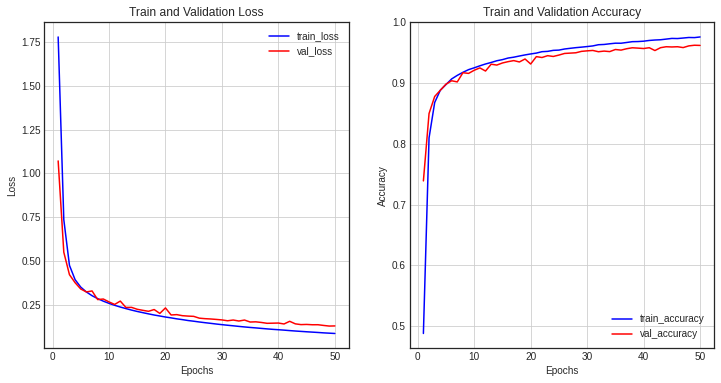

In [39]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 (1)
- evaluate

In [40]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 840us/step - loss: 0.1199 - accuracy: 0.9639


[0.11994423717260361, 0.9639000296592712]

### 학습된 모델을 통해 값 예측

In [55]:
print(x_test.shape)
print(y_test.shape)
print(y_test[0])

pred_ys = model.predict(x_test)
print(pred_ys.shape)

# 7자리
np.set_printoptions(precision=7)
print(pred_ys[0])
print(pred_ys.shape)
# (10000, 28, 28)
# (10000, 10)
# [1.0719896e-05 6.1174472e-07 7.9064404e-05 1.8148187e-03 1.5972597e-07
#  5.7580864e-06 7.8117131e-12 9.9804759e-01 1.0813986e-06 4.0038245e-05]

(10000, 28, 28)
(10000, 10)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
(10000, 10)
[1.0719896e-05 6.1174472e-07 7.9064404e-05 1.8148187e-03 1.5972597e-07
 5.7580864e-06 7.8117131e-12 9.9804759e-01 1.0813986e-06 4.0038245e-05]
(10000, 10)


Text(0.5, 1.0, 'label : 7')

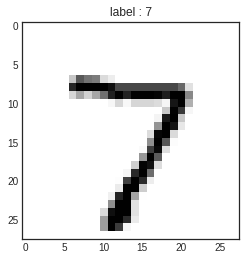

In [53]:
arg_pred_y = np.argmax(pred_ys, axis=1)
plt.imshow(x_test[0])
plt.title("predicted label : {}".format(arg_pred_y[0]))

### 모델 평가 (2)
- 혼동행렬 (Confusion Maxtrix)

In [56]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set(style='white')

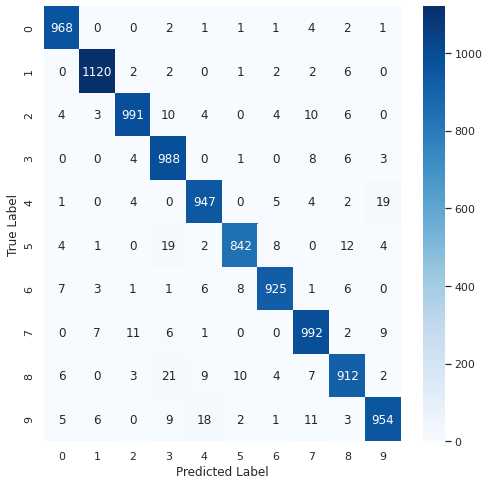

In [62]:
plt.figure(figsize=(8,8))
# 전체의 실제 label과 predict의 비교
cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 모델 평가 (3)
- 분류 보고서

In [66]:
print(classification_report(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.93      0.98      0.96      1010
           4       0.96      0.96      0.96       982
           5       0.97      0.94      0.96       892
           6       0.97      0.97      0.97       958
           7       0.95      0.96      0.96      1028
           8       0.95      0.94      0.94       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



## 모델 저장과 복원
- `save()`

- `load_model()`

- (주의)  
  시퀀셜 API, 함수형 API에서는 **모델**의 저장 및 로드기 가능하지만 서브클래싱 방식으로는 할 수 없음  
  
  서브클래싱 방식
      save_weights()
      load_weights()  
  위 두가지를 통해 **모델의 파라미터**만 저장 및 로드


- JSON 형식
  - `model.to_json()` (저장)

  - `tf.keras.models.model_from_json(file_path)` (복원)

- YAML로 직렬화
  - `model.to_yaml()` (저장)

  - `tf.keras.models.model_from_yaml(file_path)` (복원)


In [67]:
model.save('mnist_model.h5')

In [68]:
loaded_model = models.load_model('mnist_model.h5')

In [69]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense1 (Dense)               (None, 100)               78500     
_________________________________________________________________
dense2 (Dense)               (None, 64)                6464      
_________________________________________________________________
dense3 (Dense)               (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


## 콜백 (Callbacks)

- `fit()` 함수의 callbacks 매개변수를 사용하여 케라스가 훈련의 시작이나 끝에 호출할 객체 리스트를 지정할 수 있음

- 여러 개 사용 가능

- ModelCheckpoint
  - `tf.keras.callbacks.ModelCheckpoint`
  - 정기적으로 모델의 체크포인트를 저장하고, 문제가 발생할 때 복구하는데 사용

- EarlyStopping
  - `tf.keras.callbacks.EarlyStopping`
  - 검증 성능이 한동안 개선되지 않을 경우 학습을 중단할 때 사용

- LearningRateSchduler
  - `tf.keras.callbacks.LearningRateSchduler`
  - 최적화를 하는 동안 학습률(learning_rate)를 동적으로 변경할 때 사용

- TensorBoard
  - `tf.keras.callbacks.TensorBoard`
  - 모델의 경과를 모니터링할 때 사용


In [70]:
(x_train_full, y_train_full), (x_test, y_test) = load_data(path='mnist.npz')

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=111)

print("학습 데이터 : {}\t레이블 : {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터 : {}\t레이블 : {}".format(x_train.shape, y_train.shape))
print("검증 데이터 : {}\t레이블 : {}".format(x_val.shape, y_val.shape))
print("테스트 데이터 : {}\t레이블 : {}".format(x_test.shape, y_test.shape))

# 색 표현이 0~255 이기 떄문에 0~1 값으로 normalization 시키는것임
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

def build_model():
  model = Sequential([Input(shape=(28,28), name='input'),
                    Flatten(input_shape=[28,28], name='flatten'),
                    Dense(100, activation='relu', name='dense1'),
                    Dense(64, activation='relu', name='dense2'),
                    Dense(32, activation='relu', name='dense3'),
                    # softmax 마지막 output은 숫자 답이 10개 이므로 unit은 10으로 함
                    Dense(10, activation='softmax', name='output')])
  
  model.compile(loss='categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])
  return model

model = build_model()

model.summary()

학습 데이터 : (60000, 28, 28)	레이블 : (60000,)
학습 데이터 : (42000, 28, 28)	레이블 : (42000,)
검증 데이터 : (18000, 28, 28)	레이블 : (18000,)
테스트 데이터 : (10000, 28, 28)	레이블 : (10000,)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense1 (Dense)               (None, 100)               78500     
_________________________________________________________________
dense2 (Dense)               (None, 64)                6464      
_________________________________________________________________
dense3 (Dense)               (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_____________________

In [76]:
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, TensorBoard

### ModelCheckpoint

In [73]:
check_point_cb = ModelCheckpoint('keras_mnist_model.h5')
history = model.fit(x_train, y_train, epochs=10, callbacks=[check_point_cb])

Epoch 1/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.7993 - accuracy: 0.7742
Epoch 2/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3224 - accuracy: 0.9068
Epoch 3/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2615 - accuracy: 0.9246
Epoch 4/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2238 - accuracy: 0.9357
Epoch 5/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1964 - accuracy: 0.9430
Epoch 6/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1756 - accuracy: 0.9489
Epoch 7/10
1313/1313 [==============================] - 1s 1ms/step - loss: 0.1577 - accuracy: 0.9546
Epoch 8/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1425 - accuracy: 0.9585
Epoch 9/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1299 - accuracy: 0.9621
Epoch 10/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.119

In [74]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [77]:
loaded_model = load_model('keras_mnist_model.h5')
loaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense1 (Dense)               (None, 100)               78500     
_________________________________________________________________
dense2 (Dense)               (None, 64)                6464      
_________________________________________________________________
dense3 (Dense)               (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


최상의 모델만을 저장
- save_best_only=True

In [80]:
model = build_model()

cp = ModelCheckpoint('keras_best_model.h5', save_best_only=True)

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val), callbacks=[cp])

Epoch 1/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.8313 - accuracy: 0.7689 - val_loss: 0.3828 - val_accuracy: 0.8844
Epoch 2/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3293 - accuracy: 0.9048 - val_loss: 0.3154 - val_accuracy: 0.9045
Epoch 3/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2647 - accuracy: 0.9234 - val_loss: 0.2475 - val_accuracy: 0.9251
Epoch 4/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2212 - accuracy: 0.9362 - val_loss: 0.2201 - val_accuracy: 0.9334
Epoch 5/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1910 - accuracy: 0.9446 - val_loss: 0.1961 - val_accuracy: 0.9418
Epoch 6/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1680 - accuracy: 0.9514 - val_loss: 0.1836 - val_accuracy: 0.9447
Epoch 7/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1491 - accuracy: 0.9571 - val_loss: 0.1832 - val_accuracy:

### EarlyStopping
- 일정 에포크(patience) 동안 검증 세트에 대한 점수가 오르지 않으면 학습을 멈춤

- 모델이 향상되지 않으면 학습이 자동으로 중지되므로,  
  에포크(epochs) 숫자를 크게 해도 무방

- 학습이 끝난 후의 최상의 가중치를 복원하기 때문에 모델을 따로 복원할 필요없음

### LearningRateScheduler

### Tensorboard
- 텐서보드를 이용하여 학습과정 모니터링

텐서보드를 사용하기 위해 logs폴더를 만들고, 학습이 진행되는 동안 로그 파일을 생성

load하는데 시간 소요

- load가 안된다면 port번호를 바꿔서 실행!  
  ex) %tensorboard --logdir {log_dir} port 8000